In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
torch.manual_seed(1)

In [33]:
import torchvision
from torchvision import transforms
import torch.utils.data as Data

In [34]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
ISDOWNLOAD = False

In [35]:
TRANSFORM = torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_data = torchvision.datasets.MNIST(
    root = '../mnist',
    train = True,
    transform = TRANSFORM,
    download = ISDOWNLOAD
)

In [36]:
print(train_data.train_data.size())
print(train_data.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


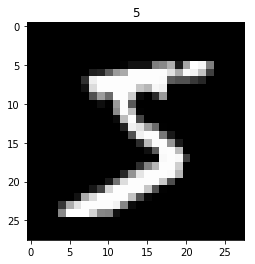

In [37]:
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')#Variable is different from tensor, when it comes to variable, there is a .data
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [48]:
train_loader = Data.DataLoader(train_data, batch_size= BATCH_SIZE, shuffle= True, num_workers=2)

In [49]:
test_data = torchvision.datasets.MNIST(
    root = '../mnist',
    train = False,
    download = ISDOWNLOAD,
    transform = TRANSFORM
)

In [50]:
test_loader = Data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle= True, num_workers=2)

In [51]:
#construct the CNN
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2, 
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    #the output size is (16,14,14)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.out = nn.Linear(32*7*7,10)
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)        #make the outout of conv2 into a vector whose size is (32*7*7, 1)
        out = self.out(x)
        return out,x        

In [52]:
cnn = CNN()
print(cnn)  # net architecture

CNN (
  (conv1): Sequential (
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential (
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear (1568 -> 10)
)


In [53]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   